Problem Statement: Study employee productivity in WFH vs WFO.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('WFH_WFO_dataset.csv', index_col= 'ID')

In [71]:
data.shape

(207, 18)

In [72]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         207 non-null    object
 1   Age                          207 non-null    int64 
 2   Occupation                   207 non-null    object
 3   Gender                       207 non-null    object
 4   Same_ofiice_home_location    207 non-null    object
 5   kids                         207 non-null    object
 6   RM_save_money                207 non-null    object
 7   RM_quality_time              207 non-null    object
 8   RM_better_sleep              207 non-null    object
 9   calmer_stressed              207 non-null    object
 10  RM_professional_growth       207 non-null    int64 
 11  RM_lazy                      207 non-null    int64 
 12  RM_productive                207 non-null    int64 
 13  digital_connect_sufficient   207 no

In [74]:
data.describe()

,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [75]:
data.drop_duplicates(ignore_index=True)

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Louis,28,Manager,Male,Yes,No,No,No,No,STRESSED,2,4,3,No,2,5,Not sure,0
179,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
180,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
181,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0


In [76]:
data['RM_productive'].value_counts()

4    69
3    66
5    45
2    24
1     3
Name: RM_productive, dtype: int64

In [77]:
data['Occupation'].unique()

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

In [78]:
data['Occupation'].value_counts()

Engineer      51
Tutor         30
Manager       29
HR            26
Business      26
Marketing     26
Recruiter     19
Name: Occupation, dtype: int64

In [79]:
data['Target'].value_counts()

0    123
1     84
Name: Target, dtype: int64

In [80]:
data['calmer_stressed'].value_counts()

STRESSED    126
CALMER       81
Name: calmer_stressed, dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
features = ['Gender','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep','RM_job_opportunities','calmer_stressed']

In [83]:
encode = LabelEncoder()

In [84]:
data[features] = data[features].apply(LabelEncoder().fit_transform)

In [85]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,0,1,1,1,1,1,0,5,1,5,Yes,5,5,2,1
2,Harry,24,Tutor,1,0,0,0,0,0,0,2,2,2,No,3,3,0,1
3,Banditaa,53,HR,0,1,1,1,1,1,0,3,3,4,No,5,3,0,1
4,Neetha,26,Engineer,0,1,0,1,1,0,1,3,4,4,No,4,5,2,0
5,Ram,26,Recruiter,1,1,0,0,1,0,1,3,3,5,Yes,4,2,2,1


In [86]:
data['RM_job_opportunities'].value_counts()

1    87
2    75
0    45
Name: RM_job_opportunities, dtype: int64

In [87]:
#data.to_csv('encoded_dataset.csv')

In [88]:
data.columns

Index(['Name', 'Age', 'Occupation', 'Gender', 'Same_ofiice_home_location',
       'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep',
       'calmer_stressed', 'RM_professional_growth', 'RM_lazy', 'RM_productive',
       'digital_connect_sufficient', 'RM_better_work_life_balance',
       'RM_improved_skillset', 'RM_job_opportunities', 'Target'],
      dtype='object')

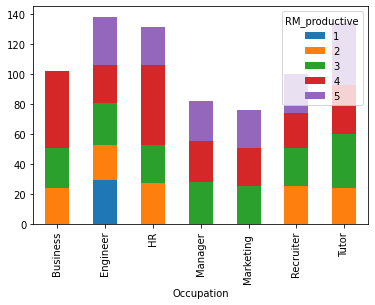

In [89]:
grouped_df = data.groupby(['Occupation','RM_productive'])['Age'].median().unstack()
grouped_df.plot(kind='bar', stacked=True)
plt.show()

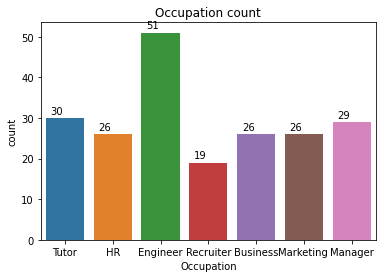

In [90]:
ax=sns.countplot(x='Occupation',data=data)
plt.title("Occupation count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

In [91]:
import matplotlib.font_manager as fm

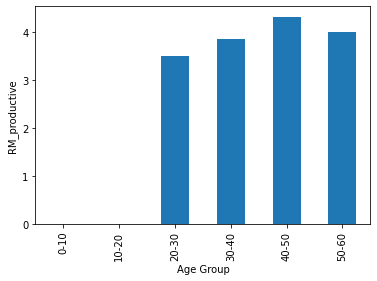

In [96]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '10-20','20-30','30-40','40-50','50-60'])

# Group by age group and compute the mean of other columns
grouped = data.groupby('Age Group').mean()

# Create a bar plot of mean income by age group
grouped['RM_productive'].plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('RM_productive')
plt.show()

In [97]:
grouped = data.groupby('Age Group')['RM_productive', 'RM_lazy'].mean()

# Print the resulting DataFrame
print(grouped)

           RM_productive   RM_lazy
Age Group                         
0-10                 NaN       NaN
10-20                NaN       NaN
20-30           3.487500  3.362500
30-40           3.857143  2.214286
40-50           4.315789  1.157895
50-60           4.000000  3.642857


C:\Users\Asus\AppData\Local\Temp\ipykernel_30788\4085455077.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = data.groupby('Age Group')['RM_productive', 'RM_lazy'].mean()


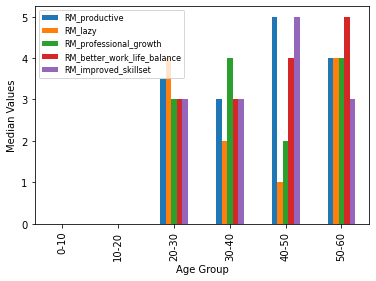

In [98]:
grouped = data.groupby('Age Group').median()
grouped = grouped[['RM_productive','RM_lazy','RM_professional_growth','RM_better_work_life_balance','RM_improved_skillset']]
grouped.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.legend(loc='upper left',prop=fm.FontProperties(size=8))
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np


In [ ]:
data["Occupation"].replace(to_replace=["Engineer","Tutor","Manager","HR","Business","Marketing ","Recruiter"], value=[1,2,3,4,5,6,7],inplace=True)
data['Occupation']

ID
1      2
2      2
3      4
4      1
5      7
      ..
203    1
204    5
205    6
206    6
207    2
Name: Occupation, Length: 207, dtype: int64

In [ ]:
x=data.drop(["Name","Target","RM_job_opportunities","digital_connect_sufficient"],axis=1)
y=data['RM_productive']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
st_x = StandardScaler()
x_t = st_x.fit_transform(x_train)
x_2 = st_x.transform(x_test)

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)


In [ ]:
print("Predicted labels:", y_pred)
print("Actual labels   :", y_test)

Predicted labels: [3 4 4 5 3 4 3 4 3 3 5 5 2 5 5 2 4 5 4 3 5 3 3 3 4 5 5 3 4 4 3 4 4 5 2 4 3
 4 4 4 4 4]
Actual labels   : ID
162    3
16     4
74     4
97     5
167    3
10     4
101    3
136    4
19     3
149    3
172    5
31     5
156    2
206    5
126    5
197    3
165    4
190    5
85     4
76     3
125    5
171    3
105    3
102    3
70     3
26     5
96     5
17     2
142    5
185    4
155    2
69     4
67     4
121    5
148    2
99     5
139    3
168    4
46     4
114    4
66     4
178    3
Name: RM_productive, dtype: int64


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.8333333333333334
Classification report:
               precision    recall  f1-score   support

           2       0.67      0.50      0.57         4
           3       0.83      0.77      0.80        13
           4       0.76      1.00      0.87        13
           5       1.00      0.83      0.91        12

    accuracy                           0.83        42
   macro avg       0.82      0.78      0.79        42
weighted avg       0.84      0.83      0.83        42

